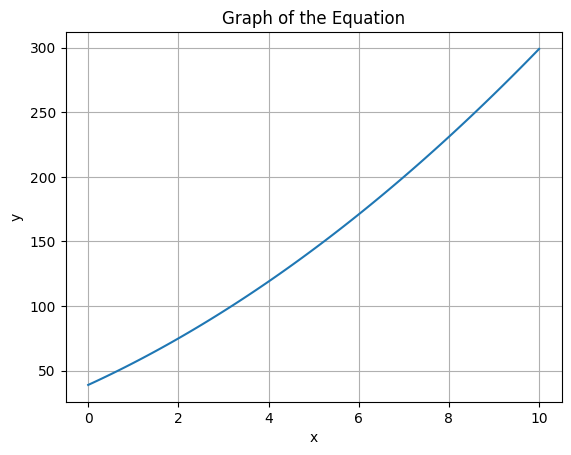

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_16524\2024746704.py", line 56, in solve_equation
    solution = self.solve_sympy(equation_input, variables)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_16524\2024746704.py", line 235, in solve_sympy
    equation = Eq(eval(equation_input, {}, {**symbols_dict, 'x': x}), 0)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    x**2 + 16* x + 39 = 0
                      ^
SyntaxError: invalid syntax
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
  

In [1]:
# Equation solver app (almost done)
import tkinter as tk
from tkinter import font
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import numpy as np

class EquationSolverApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title('Equation Solver with Graphing')
        self.geometry("500x350")  # Set the window size
        self.configure(bg="#f0f0f0")  # Set background color
        self.create_widgets()
    
    def create_widgets(self):
        # Custom font style
        custom_font = font.Font(family="Ariel", size=12, weight="bold")
     
        # Equation input
        self.equation_label = tk.Label(self, text='Enter your equation:')
        self.equation_entry = tk.Entry(self, width=50)
        self.equation_label.grid(row=0, column=0, padx=10, pady=10)
        self.equation_entry.grid(row=0, column=1, padx=10, pady=10)

        # Variable input
        self.variable_label = tk.Label(self, text='Enter your variable(s):')
        self.variable_entry = tk.Entry(self, width=20)
        self.variable_label.grid(row=1, column=0, padx=10, pady=10)
        self.variable_entry.grid(row=1, column=1, padx=10, pady=10)
        
        # Method selection
        self.method_label = tk.Label(self, text='Select a method:')
        self.methods = tk.StringVar(self)
        self.methods.set('sympy')  # default value
        self.method_menu = tk.OptionMenu(self, self.methods, 'rk2', 'rk4', 'fdm', 'bdm', 'cdm', 'odeint', 'solveivp', 'sympy')
        self.method_label.grid(row=2, column=0, padx=10, pady=10)
        self.method_menu.grid(row=2, column=1, padx=10, pady=10)
        
        # Solve button
        self.solve_button = tk.Button(self, text='Solve', command=self.solve_equation)
        self.solve_button.grid(row=3, column=0, columnspan=2, padx=10, pady=10)
        
        # Graph checkbox
        self.should_graph = tk.BooleanVar(self)
        self.graph_checkbutton = tk.Checkbutton(self, text='Show graph', variable=self.should_graph)
        self.graph_checkbutton.grid(row=4, column=0, columnspan=2, padx=10, pady=10)
    
    def solve_equation(self):
        equation_input = self.equation_entry.get()
        variables = self.variable_entry.get().split(',')  # Split variables by comma
        method_selected = self.methods.get()
        
        if method_selected == 'sympy':
            solution = self.solve_sympy(equation_input, variables)
        elif method_selected == 'odeint':
            solution = self.solve_odeint(equation_input, variables)
        elif method_selected == 'rk2':
            solution = self.solve_rk2(equation_input, variables)
        elif method_selected == 'rk4':
            solution = self.solve_rk4(equation_input, variables)
        elif method_selected == 'fdm':
            solution = self.solve_fdm(equation_input, variables)
        elif method_selected == 'bdm':
            solution = self.solve_bdm(equation_input, variables)
        elif method_selected == 'cdm':
            solution = self.solve_cdm(equation_input, variables)
        elif method_selected == 'solveivp':
            solution = self.solve_solveivp(equation_input, variables)
        else:
            solution = f"Solution method '{method_selected}' not implemented yet."
        
        solution_label = tk.Label(self, text=f'Solution: {solution}')
        solution_label.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

        if self.should_graph.get():
            self.graph_equation(equation_input, variables)
    
    def solve_rk2(self, equation_input, variables):
        # Implementing Runge-Kutta 2nd order method
        symbols_dict = {var: symbols(var) for var in variables}
        # Define the function
        def f(x_val, y):
            return eval(equation_input, {}, {**symbols_dict, 'x': x_val})

        # Define the initial condition
        x0 = 0
        y0 = 1  # Initial value of y

        # Define step size
        h = 0.1

        # Number of iterations
        n = 100

        # Implement RK2 method
        x_values = [x0]
        y_values = [y0]
        for i in range(n):
            k1 = f(x_values[-1], y_values[-1])
            k2 = f(x_values[-1] + h, y_values[-1] + h * k1)
            y_next = y_values[-1] + (h / 2) * (k1 + k2)
            x_values.append(x_values[-1] + h)
            y_values.append(y_next)

        return y_values
    
    def solve_rk4(self, equation_input, variables):
        # Implementing Runge-Kutta 4th order method
        symbols_dict = {var: symbols(var) for var in variables}
        # Define the function
        def f(x_val, y):
            return eval(equation_input, {}, {**symbols_dict, 'x': x_val})

        # Define the initial condition
        x0 = 0
        y0 = 1  # Initial value of y

        # Define step size
        h = 0.1

        # Number of iterations
        n = 100

        # Implement RK4 method
        x_values = [x0]
        y_values = [y0]
        for i in range(n):
            k1 = f(x_values[-1], y_values[-1])
            k2 = f(x_values[-1] + h / 2, y_values[-1] + h * k1 / 2)
            k3 = f(x_values[-1] + h / 2, y_values[-1] + h * k2 / 2)
            k4 = f(x_values[-1] + h, y_values[-1] + h * k3)
            y_next = y_values[-1] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
            x_values.append(x_values[-1] + h)
            y_values.append(y_next)

        return y_values

    def solve_fdm(self, equation_input, variables):
        # Implementing Finite Difference Method
        symbols_dict = {var: symbols(var) for var in variables}
        # Define the function
        def f(x_val, y):
            return eval(equation_input, {}, {**symbols_dict, 'x': x_val})

        # Define the initial condition
        x0 = 0
        y0 = 1  # Initial value of y

        # Define step size
        h = 0.1

        # Number of iterations
        n = 100

        # Implement FDM method
        x_values = [x0]
        y_values = [y0]
        for i in range(n):
            y_next = y_values[-1] + h * f(x_values[-1], y_values[-1])
            x_values.append(x_values[-1] + h)
            y_values.append(y_next)

        return y_values

    def solve_bdm(self, equation_input, variables):
        # Implementing Backward Finite Difference Method
        symbols_dict = {var: symbols(var) for var in variables}
        # Define the function
        def f(x_val, y):
            return eval(equation_input, {}, {**symbols_dict, 'x': x_val})

        # Define the initial condition
        x0 = 0
        y0 = 1  # Initial value of y

        # Define step size
        h = 0.1

        # Number of iterations
        n = 100

        # Implement BDM method
        x_values = [x0]
        y_values = [y0]
        for i in range(n):
            y_next = (y_values[-1] + h * f(x_values[-1], y_values[-1])) / (1 - h * f(x_values[-1], y_values[-1]))
            x_values.append(x_values[-1] + h)
            y_values.append(y_next)

        return y_values

    def solve_cdm(self, equation_input, variables):
        # Implementing Central Finite Difference Method
        symbols_dict = {var: symbols(var) for var in variables}
        # Define the function
        def f(x_val, y):
            return eval(equation_input, {}, {**symbols_dict, 'x': x_val})

        # Define the initial condition
        x0 = 0
        y0 = 1  # Initial value of y

        # Define step size
        h = 0.1

        # Number of iterations
        n = 100

        # Implement CDM method
        x_values = [x0]
        y_values = [y0]
        for i in range(n):
            y_next = (y_values[-2] - y_values[-2] + 2*h*f(x_values[-1], y_values[-1])) / (2*f(x_values[-1], y_values[-1]))
            x_values.append(x_values[-1] + h)
            y_values.append(y_next)

        return y_values

    def solve_solveivp(self, equation_input, variables):
        # Implementing solve_ivp method
        def f(t, y):
            return eval(equation_input)

        t_span = (0, 10)  # Example time span
        y0 = [1]  # Initial value of y

        sol = solve_ivp(f, t_span, y0)
        return sol.y.flatten()  # Flatten the array to ensure compatibility with plotting
    
    def solve_sympy(self, equation_input, variables):
        symbols_dict = {var: symbols(var) for var in variables}
        x = symbols(variables[0])
        equation = Eq(eval(equation_input, {}, {**symbols_dict, 'x': x}), 0)
        solution = solve(equation, x)
        return solution
    
    def solve_odeint(self, equation_input, variables):
        def ode_func(y, x):
            return eval(equation_input)

        x_vals = np.linspace(0, 10, 100)  # Example x values
        y_vals = odeint(ode_func, 0, x_vals)
        return y_vals.flatten()  # Flatten the array to ensure compatibility with plotting
        
    def graph_equation(self, equation_input, variables):
        x_vals = np.linspace(0, 10, 100)  # Example x values
        x = symbols(variables[0])
        symbols_dict = {var: symbols(var) for var in variables}
        y_vals = [eval(equation_input, {}, {**symbols_dict, 'x': val}) for val in x_vals]
        plt.plot(x_vals, y_vals)
        plt.xlabel(variables[0])
        plt.ylabel('y')
        plt.title('Graph of the Equation')
        plt.grid(True)
        plt.show()


if __name__ == "__main__":
    app = EquationSolverApp()
    app.mainloop()


In [ ]:
# equation_solver.py

import numpy as np
from scipy.integrate import odeint, solve_ivp
import sympy as sp

def fdm(func, x_values, h):
    """
    Finite Difference Method for solving ordinary differential equations.

    Parameters:
    - func: Function representing the ODE.
    - x_values: Array of x values.
    - h: Step size.

    Returns:
    - Array of y values corresponding to the ODE solution.
    """
    # Implementation of FDM here
    # ...

def bdm(func, x_values, y_boundary_conditions):
    """
    Boundary Difference Method for solving partial differential equations.

    Parameters:
    - func: Function representing the PDE.
    - x_values: Array of x values.
    - y_boundary_conditions: Tuple of boundary conditions.

    Returns:
    - Array of y values corresponding to the PDE solution.
    """
    # Implementation of BDM here
    # ...

def cdm(func, x_values, h):
    """
    Central Difference Method for solving partial differential equations.

    Parameters:
    - func: Function representing the PDE.
    - x_values: Array of x values.
    - h: Step size.

    Returns:
    - Array of y values corresponding to the PDE solution.
    """
    # Implementation of CDM here
    # ...

def rk2(func, y0, t, h):
    """
    Runge-Kutta 2nd order method for solving ordinary differential equations.

    Parameters:
    - func: Function representing the ODE.
    - y0: Initial conditions.
    - t: Time points.
    - h: Step size.

    Returns:
    - Array of y values corresponding to the ODE solution.
    """
    # Implementation of RK2 here
    # ...

def rk4(func, y0, t, h):
    """
    Runge-Kutta 4th order method for solving ordinary differential equations.

    Parameters:
    - func: Function representing the ODE.
    - y0: Initial conditions.
    - t: Time points.
    - h: Step size.

    Returns:
    - Array of y values corresponding to the ODE solution.
    """
    # Implementation of RK4 here
    # ...

def solve_ode(func, y0, t):
    """
    Solves an ordinary differential equation using odeint.

    Parameters:
    - func: Function representing the ODE.
    - y0: Initial conditions.
    - t: Time points.

    Returns:
    - Array of y values corresponding to the ODE solution.
    """
    return odeint(func, y0, t)

def solve_ivp(func, t_span, y0):
    """
    Solves an initial value problem using solve_ivp.

    Parameters:
    - func: Function representing the ODE.
    - t_span: Tuple of start and end time.
    - y0: Initial conditions.

    Returns:
    - Solution object containing the solution.
    """
    return solve_ivp(func, t_span, y0)

def solve_symbolic_eq(equation):
    """
    Solves a symbolic equation using SymPy.

    Parameters:
    - equation: SymPy equation.

    Returns:
    - Solution of the symbolic equation.
    """
    return sp.solve(equation)

# Additional functions or utilities can be added as needed
